# Parkinson's Disease Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! ls

drive  sample_data


In [4]:
os.chdir('drive/MyDrive/project')

In [5]:
! ls

100_spiral_model.h5  graph   model_plot.png  spiral_data
checkpoint	     model   model.png	     spiral_processed
checkpoint2	     model2  spiral


In [3]:
import os
import cv2
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
plt.style.use('dark_background')

### Splitting dataset

In [6]:
cur_dir = os.getcwd()

base_dir = os.path.join(cur_dir, 'spiral_processed')
# os.mkdir(base_dir) #make base directory

In [10]:
!ls base_dir

ls: cannot access 'base_dir': No such file or directory


In [11]:
os.listdir(base_dir)

['train', 'validation', 'test']

In [12]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_h_dir = os.path.join(train_dir, 'healthy')
# os.mkdir(train_h_dir)

train_p_dir = os.path.join(train_dir, 'parkinson')
# os.mkdir(train_p_dir)

validation_h_dir = os.path.join(validation_dir, 'healthy')
# os.mkdir(validation_h_dir)

validation_p_dir = os.path.join(validation_dir, 'parkinson')
# os.mkdir(validation_p_dir)

test_h_dir = os.path.join(test_dir, 'healthy')
# os.mkdir(test_h_dir)

test_p_dir = os.path.join(test_dir, 'parkinson')
# os.mkdir(test_p_dir)

In [13]:
img_path = os.path.join(cur_dir,'spiral/healthy')
img_list = os.listdir(img_path)
original_dataset_dir = os.path.join(cur_dir, img_path)

# Healthy training dataset
for images in img_list[0:1000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(train_h_dir, images)
#     shutil.copyfile(src, dst)

# Healthy training dataset
for images in img_list[1000:1500]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(test_h_dir, images)
#     shutil.copyfile(src, dst)
    
# Healthy training dataset
for images in img_list[1500:2000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(validation_h_dir, images)
#     shutil.copyfile(src, dst)
    

In [14]:
a, b, numbers = next(os.walk(train_h_dir))
print(len(numbers))

1000


In [15]:
a, b, numbers = next(os.walk(test_h_dir))
print(len(numbers))

500


In [16]:
a, b, numbers = next(os.walk(validation_h_dir))
print(len(numbers))

500


### Training Data

In [17]:
train = tf.keras.utils.image_dataset_from_directory(train_dir)
data_iterator = train.as_numpy_iterator()


Found 2000 files belonging to 2 classes.


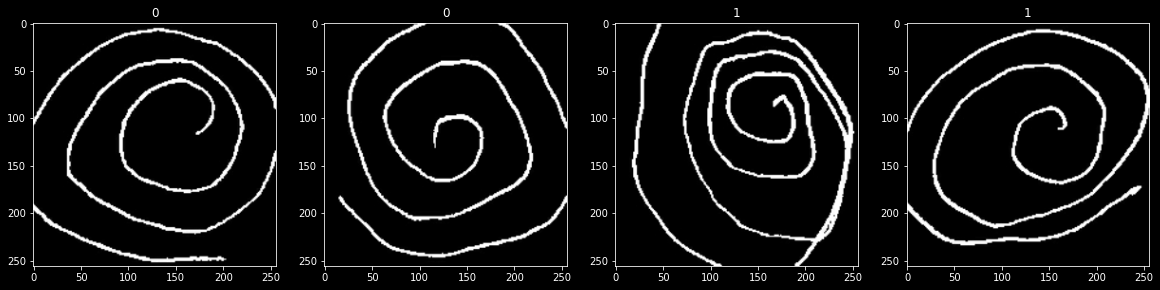

In [18]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
train = train.map(lambda x,y: (x/255, y))

In [20]:
train.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

### Testing Data

In [21]:
test = tf.keras.utils.image_dataset_from_directory(test_dir)
data_iterator = test.as_numpy_iterator()

Found 1000 files belonging to 2 classes.


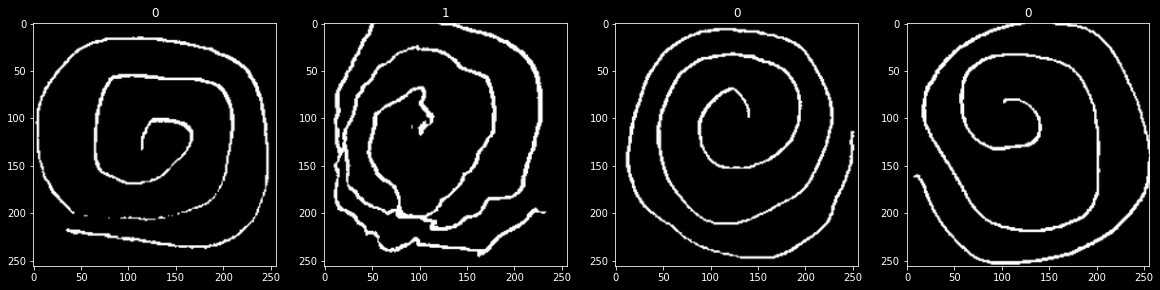

In [22]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
test = test.map(lambda x,y: (x/255, y))

In [24]:
test.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

### Validation Data

In [25]:
valid = tf.keras.utils.image_dataset_from_directory(validation_dir)
data_iterator = valid.as_numpy_iterator()

Found 1000 files belonging to 2 classes.


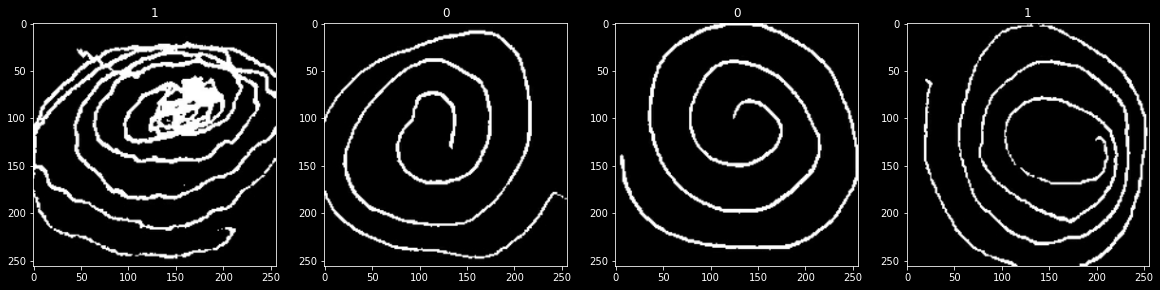

In [26]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [27]:
valid = valid.map(lambda x,y: (x/255, y))

In [28]:
valid.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

---

In [29]:
img_path = os.path.join(cur_dir,'spiral/parkinson/')
img_list = os.listdir(img_path)
original_dataset_dir = os.path.join(cur_dir, img_path)


# Parkinson training dataset
for images in img_list[0:1000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(train_p_dir, images)
#     shutil.copyfile(src, dst)
    

# Parkinson training dataset
for images in img_list[1000:1500]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(test_p_dir, images)
#     shutil.copyfile(src, dst)



# Parkinson training dataset
for images in img_list[1500:2000]:
    src = os.path.join(original_dataset_dir, images)
    dst = os.path.join(validation_p_dir, images)
#     shutil.copyfile(src, dst)
    

In [30]:
a, b, numbers = next(os.walk(train_p_dir))
print(len(numbers))

1000


In [31]:
a, b, numbers = next(os.walk(test_p_dir))
print(len(numbers))

500


In [32]:
a, b, numbers = next(os.walk(validation_p_dir))
print(len(numbers))

500


## Designing the MODEL

In [54]:
model = Sequential()

# Feature Layer
model.add(Conv2D(2, (15, 15), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(4, (10, 10), activation='relu',strides=(2,2) ))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))

#Hidden Layers

model.add(Dense(412, activation='relu'))

#Output Layer
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 242, 242, 2)       1352      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 121, 121, 2)      0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 121, 121, 2)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 4)         804       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 4)        0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 28, 28, 4)        

In [55]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [tensorboard_callback,reduce_learningrate]

In [56]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'])

In [57]:
history = model.fit(train,
                   epochs=101,
                   validation_data=valid,
                   callbacks=reduce_learningrate,
                   batch_size = 15)


Epoch 1/101
63/63 [==============================] - 7s 102ms/step - loss: 0.6896 - accuracy: 0.5325 - val_loss: 0.6656 - val_accuracy: 0.6240 - lr: 1.0000e-05
Epoch 2/101
63/63 [==============================] - 7s 100ms/step - loss: 0.6646 - accuracy: 0.5975 - val_loss: 0.6453 - val_accuracy: 0.6930 - lr: 1.0000e-05
Epoch 3/101
63/63 [==============================] - 7s 100ms/step - loss: 0.6402 - accuracy: 0.6605 - val_loss: 0.6222 - val_accuracy: 0.7120 - lr: 1.0000e-05
Epoch 4/101
63/63 [==============================] - 7s 100ms/step - loss: 0.6234 - accuracy: 0.6620 - val_loss: 0.5969 - val_accuracy: 0.7230 - lr: 1.0000e-05
Epoch 5/101
63/63 [==============================] - 7s 102ms/step - loss: 0.6051 - accuracy: 0.6745 - val_loss: 0.5717 - val_accuracy: 0.7320 - lr: 1.0000e-05
Epoch 6/101
63/63 [==============================] - 7s 103ms/step - loss: 0.5812 - accuracy: 0.7065 - val_loss: 0.5475 - val_accuracy: 0.7400 - lr: 1.0000e-05
Epoch 7/101
63/63 [=====================

### Model Evaluation

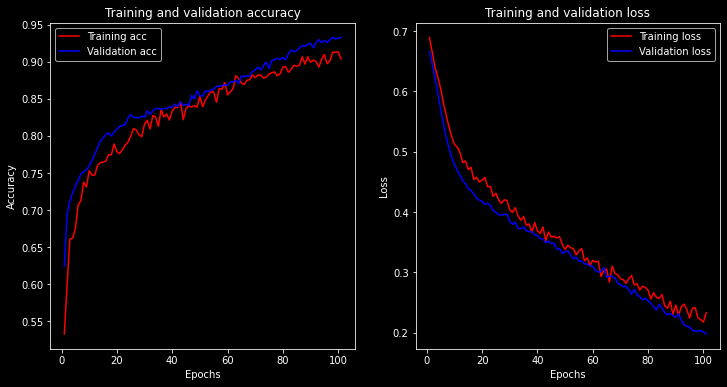

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
    
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [59]:
loss, accuracy = model.evaluate(train, verbose=1)
print(f'Training Accuracy = {accuracy*100}')

63/63 [==============================] - 7s 93ms/step - loss: 0.1045 - accuracy: 0.9835
Training Accuracy = 98.35000038146973


In [62]:
loss, accuracy = model.evaluate(test, verbose=1)
print(f'Training Accuracy = {accuracy*100}')

32/32 [==============================] - 3s 75ms/step - loss: 0.1978 - accuracy: 0.9300
Training Accuracy = 93.00000071525574


In [63]:
!ls

100_spiral_model.h5  graph   model_plot.png  spiral_data
checkpoint	     model   model.png	     spiral_processed
checkpointP	     model2  spiral


In [64]:
cur_dir = os.getcwd()
model_path = os.path.join(cur_dir, 'modelp')

if not os.path.exists(model_path):
    os.makedirs(model_path)

json_model = os.path.join(model_path, 'model_structure.json')
weight_model = os.path.join(model_path, 'model_weights.h5')

model_structure = model.to_json()
with open(json_model ,"w") as f :
    f.write(model_structure)

model.save_weights(weight_model)

In [65]:
!ls

100_spiral_model.h5  graph   modelp	     spiral
checkpoint	     model   model_plot.png  spiral_data
checkpointP	     model2  model.png	     spiral_processed


In [66]:
!ls modelp

model_structure.json  model_weights.h5


----

In [39]:
model = Sequential()

# Feature Layer
model.add(Conv2D(2, (15, 15), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(4, (10, 10), activation='relu',strides=(2,2) ))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))

#Hidden Layers

model.add(Dense(512, activation='relu'))

#Output Layer
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 242, 242, 2)       1352      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 121, 121, 2)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 121, 121, 2)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 4)         804       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 4)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 4)        

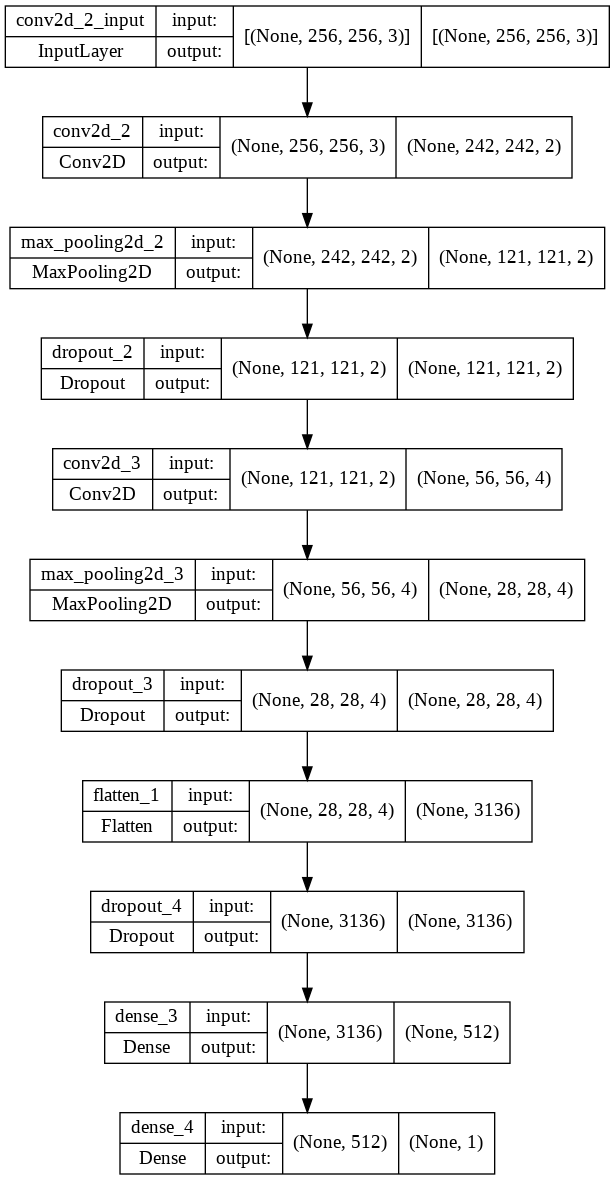

In [40]:
from keras.utils.vis_utils import plot_model

# plot_model(model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)

plot_model(model, show_shapes=True, show_layer_names=True)

In [41]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

reduce_learningrate = ReduceLROnPlateau(
                              monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.00001)
early_stopping = tf.keras.callbacks.EarlyStopping(
                              monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              mode='auto',
                              baseline=None,
                              restore_best_weights=True
                          )

cur_dir = os.getcwd()
ckpt_path = os.path.join(cur_dir, 'checkpointP')

if not os.path.exists(ckpt_path):
    os.makedirs(ckpt_path)

cp_path = os.path.join(ckpt_path, "Checkpoint")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=cp_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


callbacks_list = [reduce_learningrate, checkpoint_callback]

In [42]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'])

In [43]:
history = model.fit(train,
                   epochs = 101,
                   validation_data = valid,
                   callbacks = reduce_learningrate,
                   batch_size = 18)


Epoch 1/101
63/63 [==============================] - 8s 105ms/step - loss: 0.6964 - accuracy: 0.5370 - val_loss: 0.6696 - val_accuracy: 0.6160 - lr: 1.0000e-05
Epoch 2/101
63/63 [==============================] - 7s 101ms/step - loss: 0.6637 - accuracy: 0.6015 - val_loss: 0.6440 - val_accuracy: 0.6930 - lr: 1.0000e-05
Epoch 3/101
63/63 [==============================] - 7s 102ms/step - loss: 0.6423 - accuracy: 0.6395 - val_loss: 0.6200 - val_accuracy: 0.7310 - lr: 1.0000e-05
Epoch 4/101
63/63 [==============================] - 7s 100ms/step - loss: 0.6155 - accuracy: 0.6810 - val_loss: 0.5943 - val_accuracy: 0.7610 - lr: 1.0000e-05
Epoch 5/101
63/63 [==============================] - 7s 109ms/step - loss: 0.5945 - accuracy: 0.7015 - val_loss: 0.5693 - val_accuracy: 0.7700 - lr: 1.0000e-05
Epoch 6/101
63/63 [==============================] - 7s 100ms/step - loss: 0.5689 - accuracy: 0.7225 - val_loss: 0.5413 - val_accuracy: 0.7840 - lr: 1.0000e-05
Epoch 7/101
63/63 [=====================

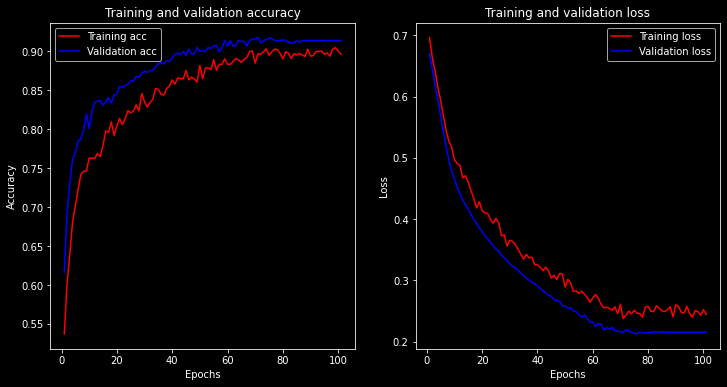

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



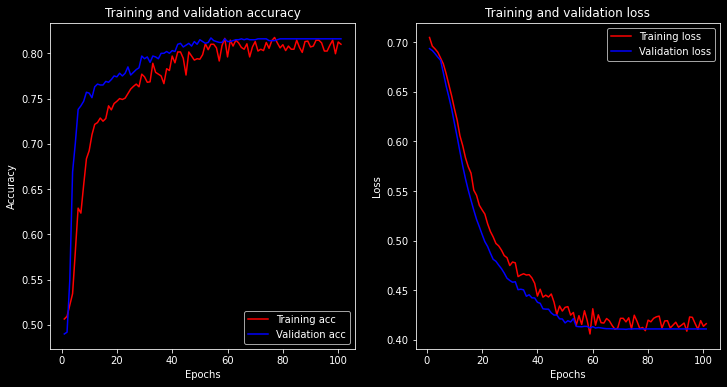

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc', color = 'red')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [46]:
!ls

100_spiral_model.h5  graph   model_plot.png  spiral_data
checkpoint	     model   model.png	     spiral_processed
checkpointP	     model2  spiral


In [45]:
! ls graph

In [47]:
loss, accuracy = model.evaluate(train, verbose=1)
print(f'Training Accuracy = {accuracy*100}')

63/63 [==============================] - 4s 61ms/step - loss: 0.1435 - accuracy: 0.9630
Training Accuracy = 96.29999995231628


In [48]:
loss, accuracy = model.evaluate(test, verbose=1)
print(f'Testing Accuracy = {accuracy*100}')

32/32 [==============================] - 71s 2s/step - loss: 0.2151 - accuracy: 0.9120
Testing Accuracy = 91.20000004768372


### Test on Data

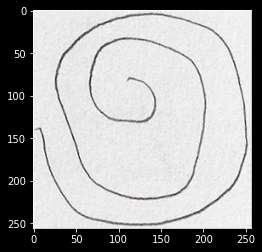

In [ ]:
img_path = os.path.join(cur_dir, 'spiral/healthy/healthy_V01HE01_0_1119.jpg')

img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

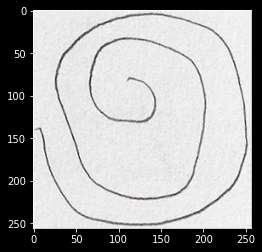

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.33520493]]


In [ ]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person is Healthy


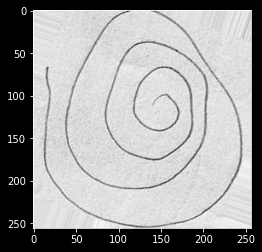

In [ ]:
img_path = os.path.join(cur_dir, 'spiral/parkinson/parkinson_V01PE01_0_1319.jpg')

img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

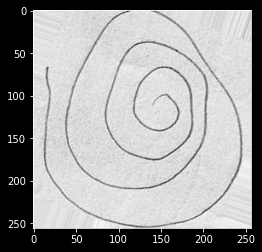

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.56343734]]


In [ ]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person may have parkinson


### Saving the model

In [ ]:
cur_dir = os.getcwd()
model_path = os.path.join(cur_dir, 'model2')

if not os.path.exists(model_path):
    os.makedirs(model_path)

json_model = os.path.join(model_path, 'model_structure.json')
weight_model = os.path.join(model_path, 'model_weights.h5')

# model_structure = model.to_json()
# with open(json_model ,"w") as f :
#     f.write(model_structure)

# model.save_weights(weight_model)

In [ ]:
! ls

100_spiral_model.h5  graph  model2	    model.png  spiral_data
checkpoint	     model  model_plot.png  spiral


In [ ]:
! ls model2

model_structure.json  model_weights.h5
